In [1]:
from pprint import pprint
from kid_readout.measurement import core, legacy
from kid_readout.measurement.io import readoutnc
from kid_readout.analysis.resonator import plot_resonator

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
filename = '/data/readout/2016-01-08_213458_sweep_and_stream.nc'
rnc = readoutnc.ReadoutNetCDF(filename)

In [3]:
rnc.sweeps

In [4]:
rnc.timestreams

In [5]:
[tg.lo for tg in rnc.timestreams]

[array([ 1410.,  1410.,  1410.,  1410.,  1410.,  1410.,  1410.,  1410.,
         1410.,  1410.,  1410.,  1410.,  1410.,  1410.,  1410.,  1410.]),
 array([ 1410.,  1410.,  1410.,  1410.,  1410.,  1410.,  1410.,  1410.,
         1410.,  1410.,  1410.,  1410.,  1410.,  1410.,  1410.,  1410.]),
 array([ 1410.,  1410.,  1410.,  1410.,  1410.,  1410.,  1410.,  1410.,
         1410.,  1410.,  1410.,  1410.,  1410.,  1410.,  1410.,  1410.]),
 array([ 1410.,  1410.,  1410.,  1410.,  1410.,  1410.,  1410.,  1410.,
         1410.,  1410.,  1410.,  1410.,  1410.,  1410.,  1410.,  1410.]),
 array([ 1410.,  1410.,  1410.,  1410.,  1410.,  1410.,  1410.,  1410.,
         1410.,  1410.,  1410.,  1410.,  1410.,  1410.,  1410.,  1410.]),
 array([ 1410.,  1410.,  1410.,  1410.,  1410.,  1410.,  1410.,  1410.,
         1410.,  1410.,  1410.,  1410.,  1410.,  1410.,  1410.,  1410.]),
 array([ 1410.,  1410.,  1410.,  1410.,  1410.,  1410.,  1410.,  1410.,
         1410.,  1410.,  1410.,  1410.,  1410.,  141

In [6]:
index = 1
ssa = legacy.sweepstreamarray_from_rnc(rnc, index, index)

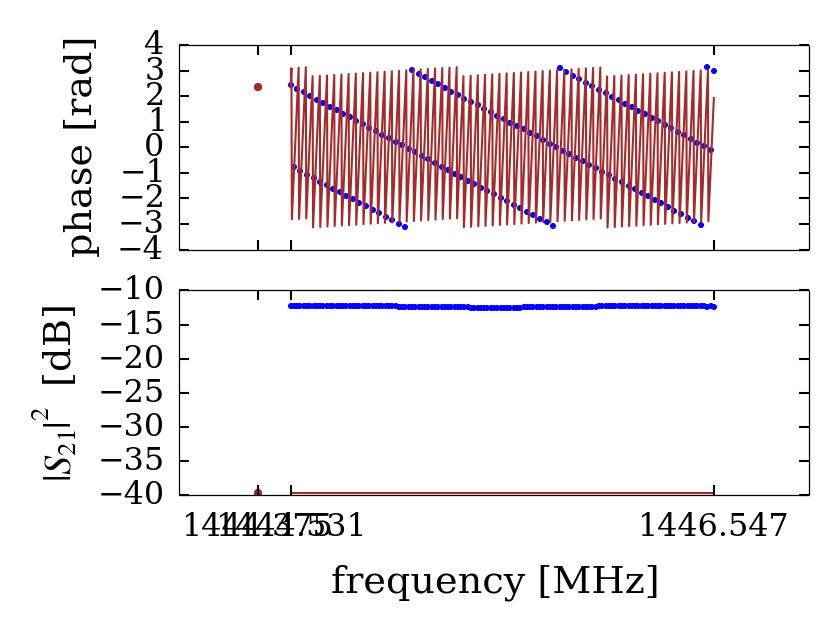

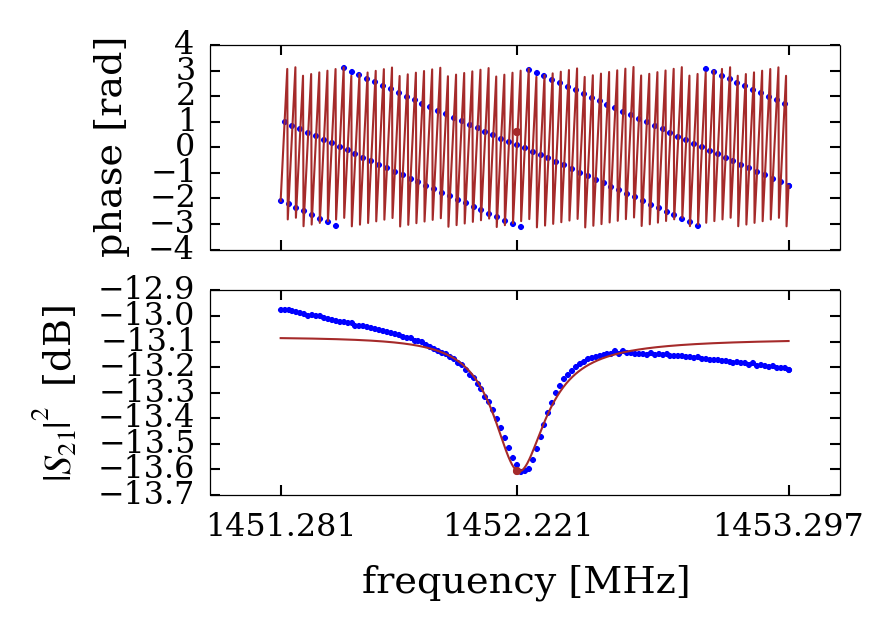

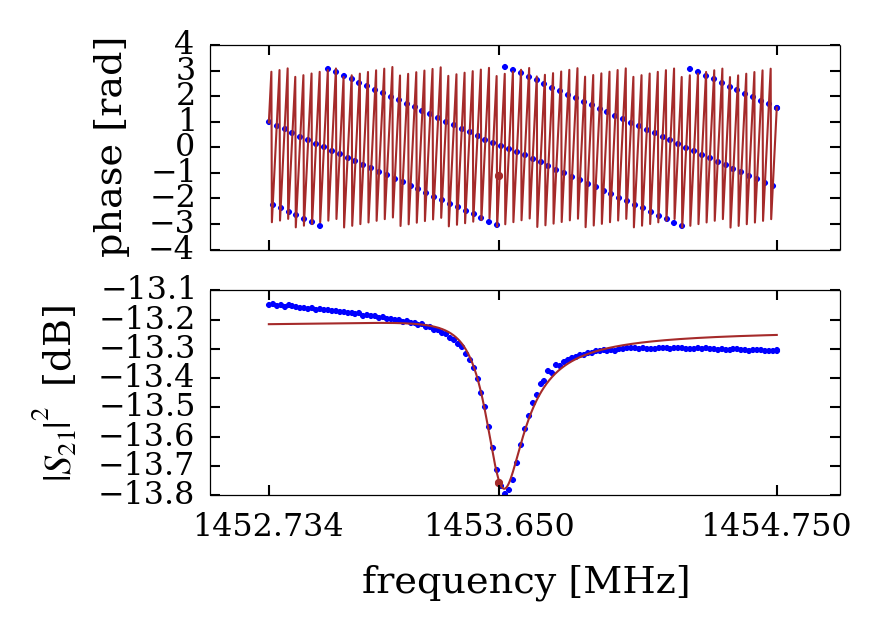

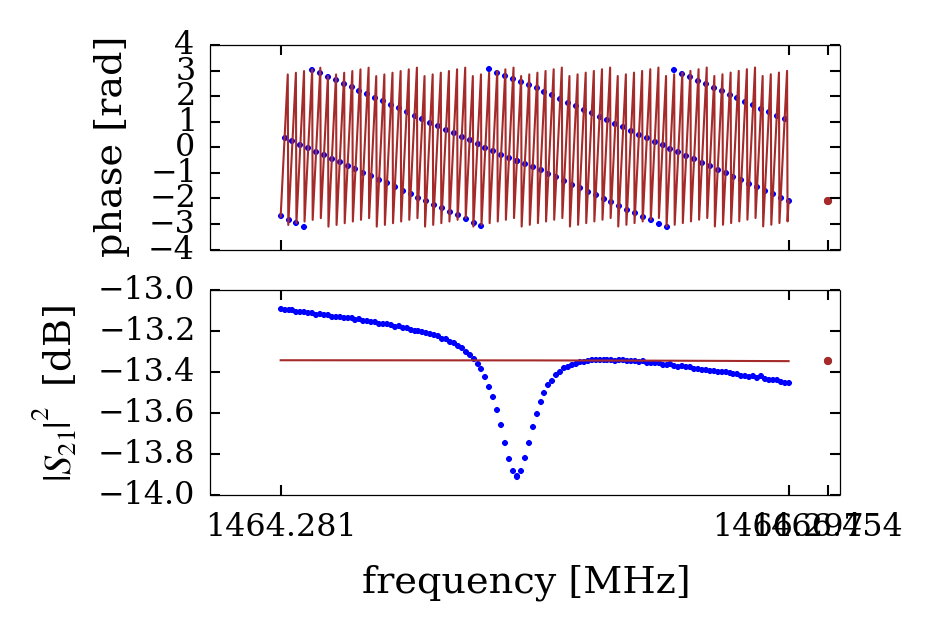

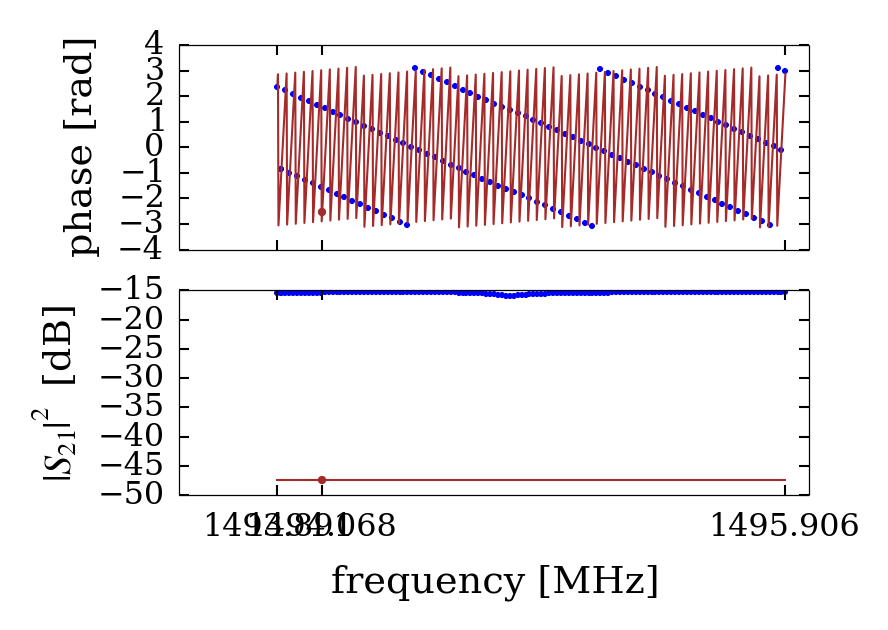

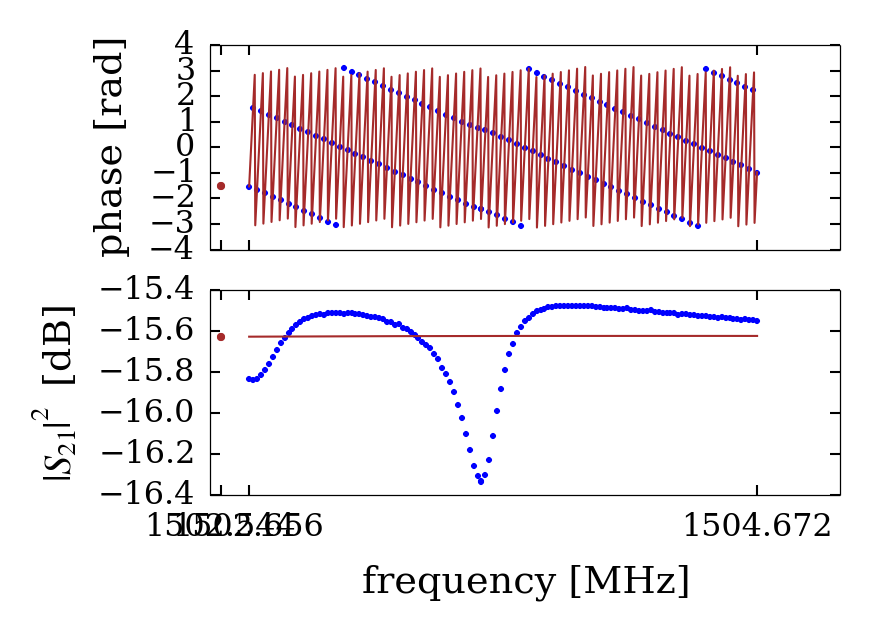

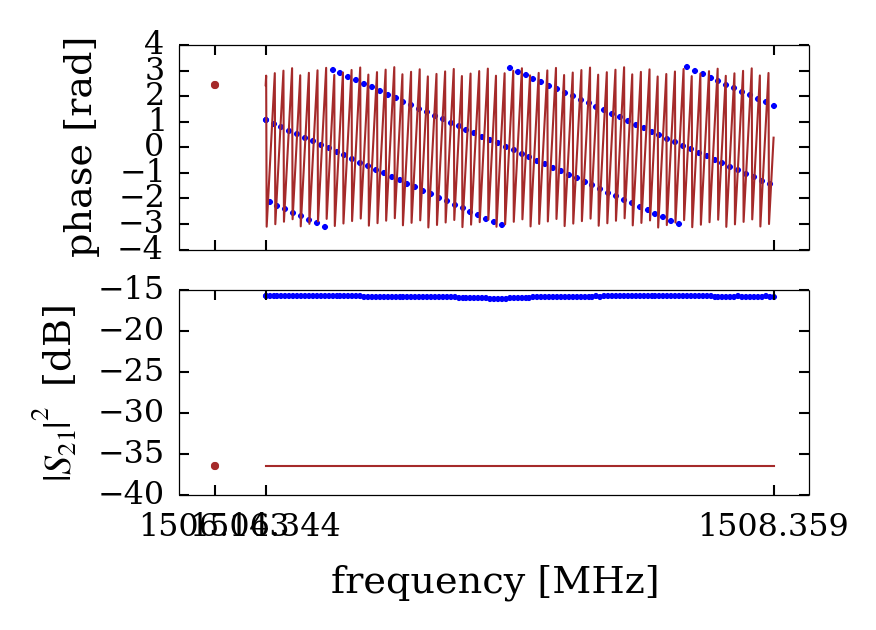

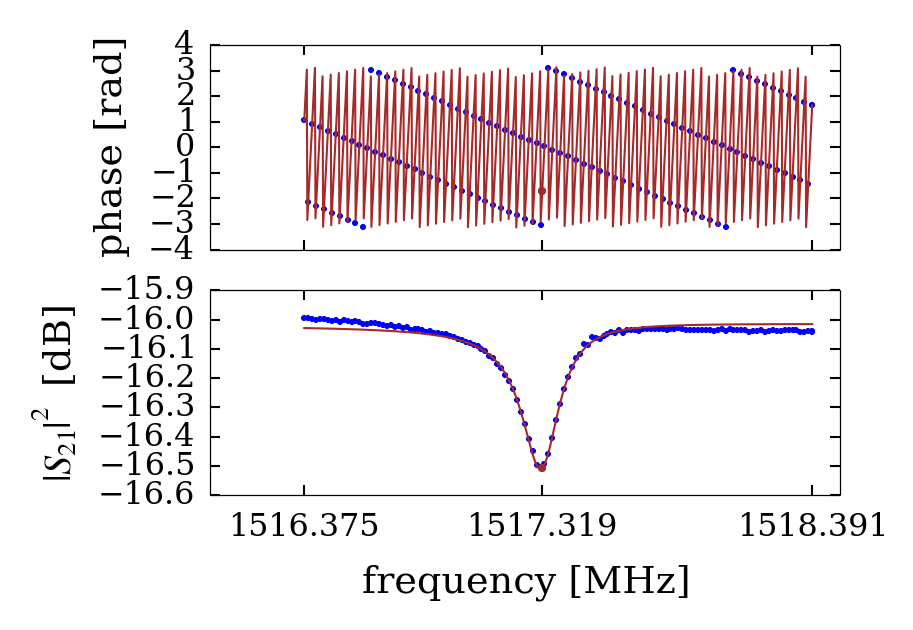

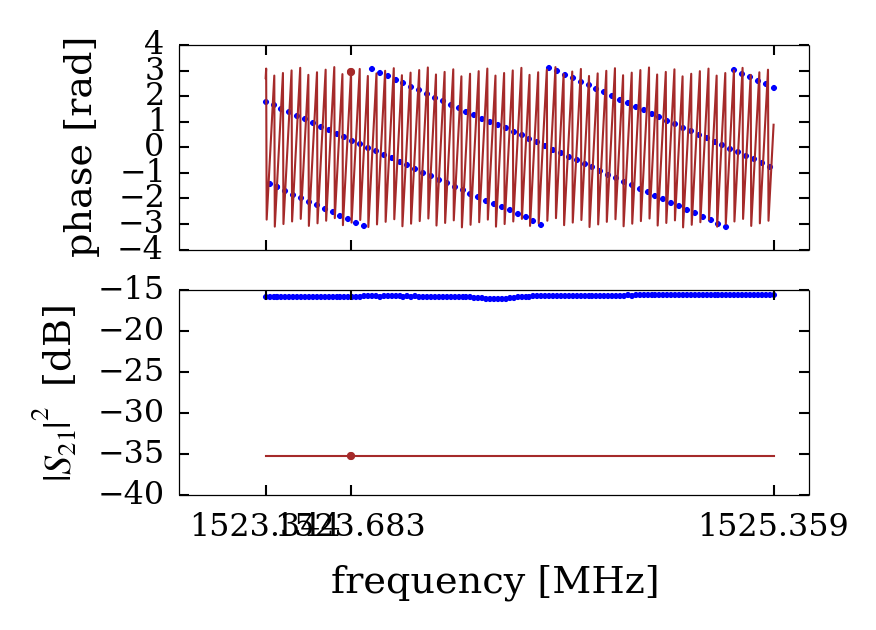

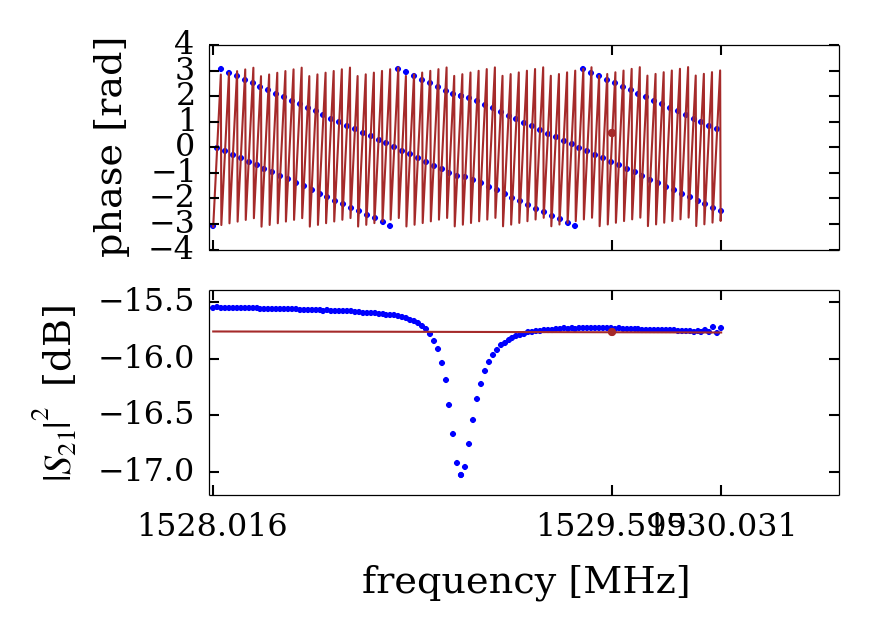

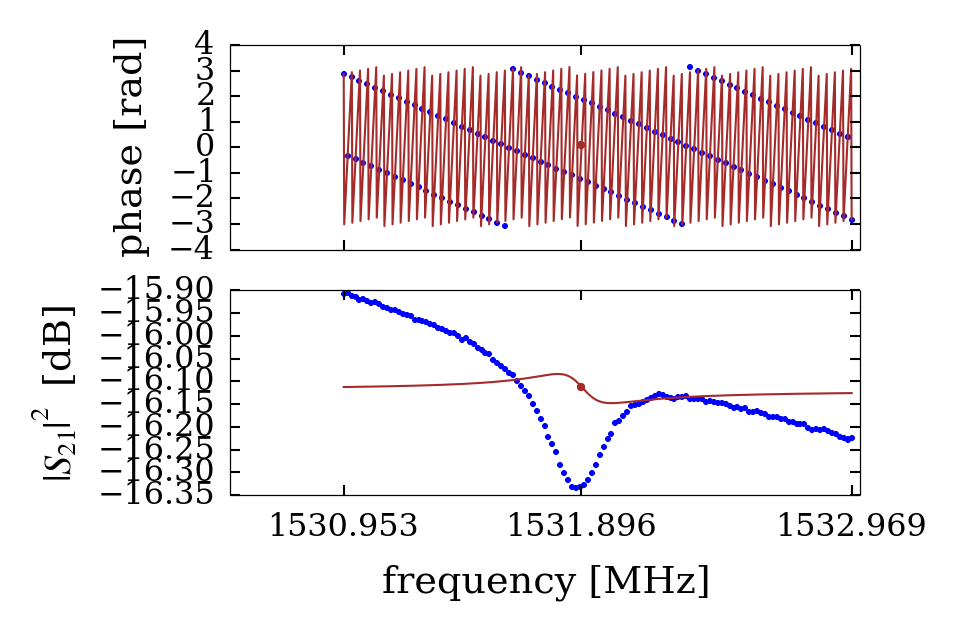

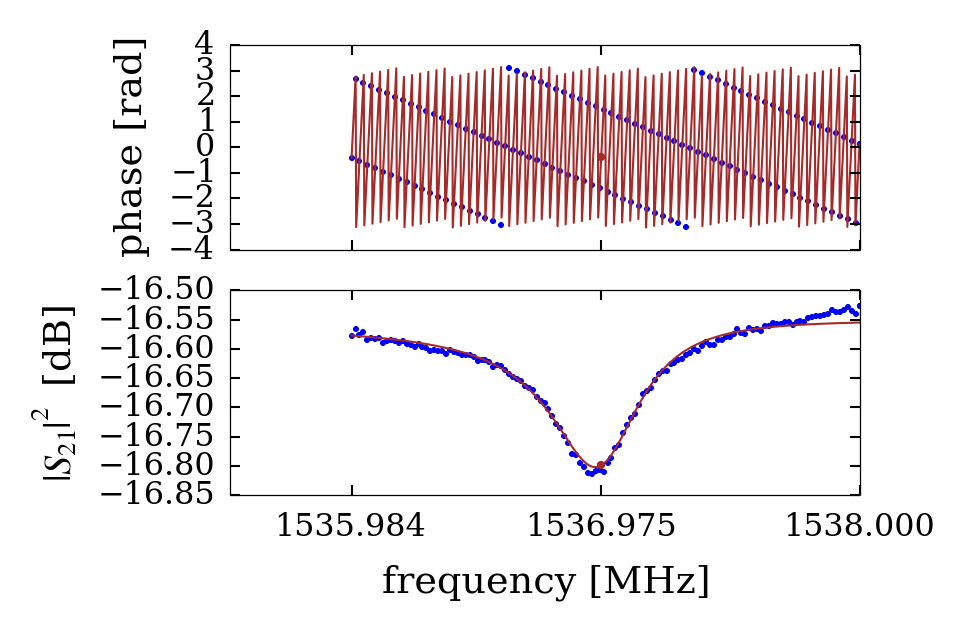

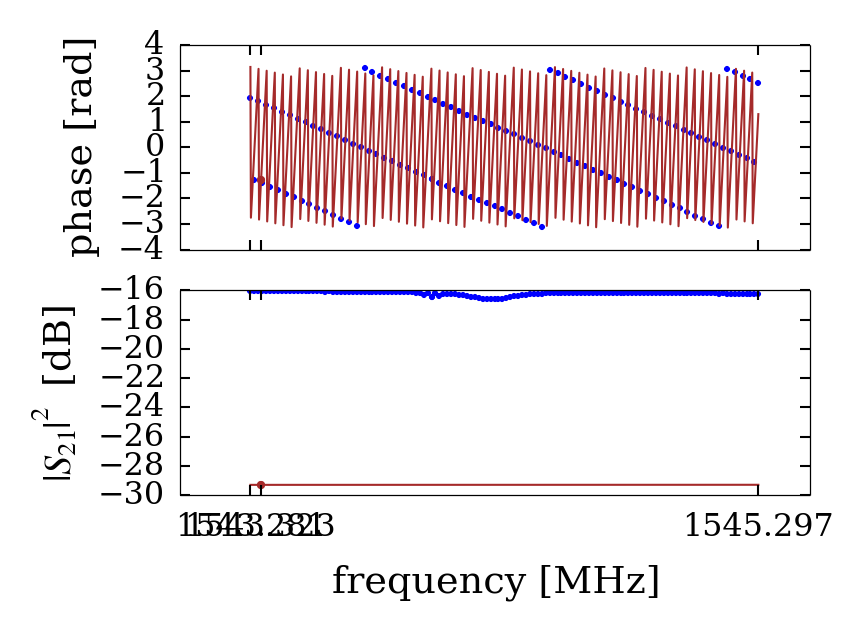

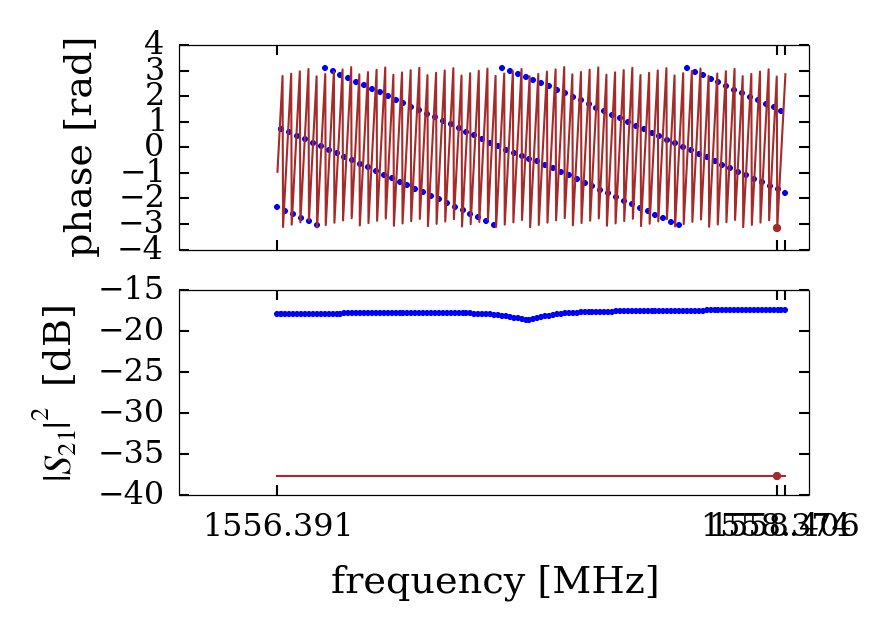

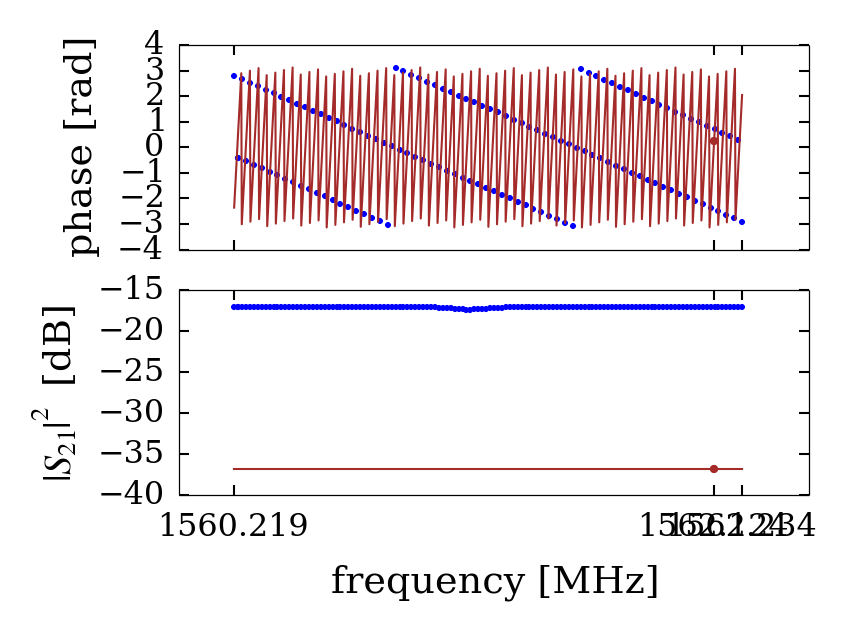

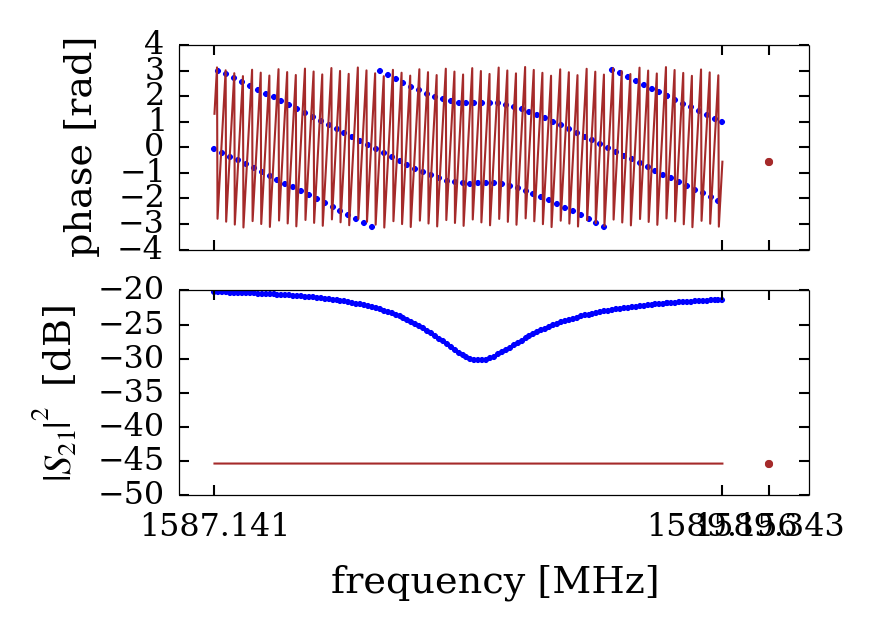

In [19]:
for n in range(ssa.num_channels):
    ss = ssa.sweep_stream(n)
    plot_resonator.amplitude_and_phase(ss.sweep.resonator, freq_scale=1e-6);

In [8]:
sg = rnc.sweeps[index]

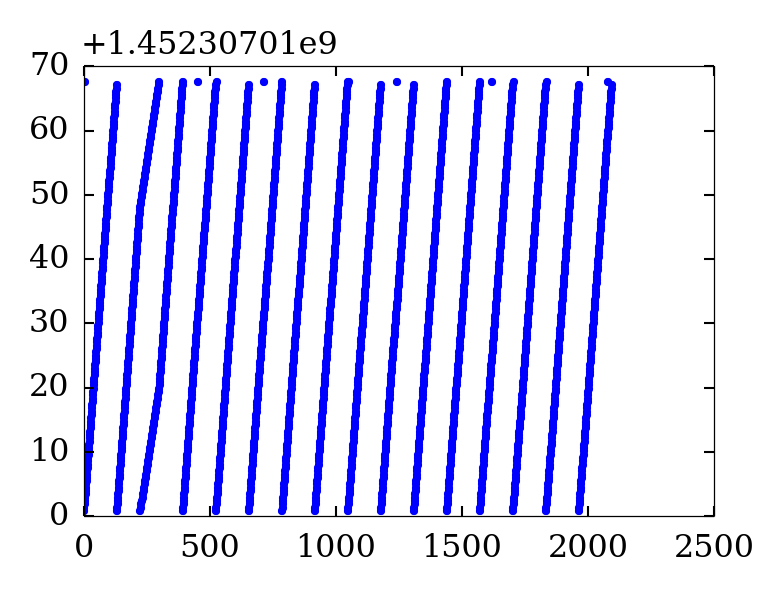

In [9]:
plt.plot(sg.timestream_group.epoch, '.')

The issue above occurs because some of the sweeps are overlapping, so sorting by frequency does not produce the expected results.

In [10]:
sg = rnc.sweeps[index]
stg = sg.timestream_group

In [11]:
indices = np.unique(stg.sweep_index)
indices.size

16

In [12]:
times = np.unique(stg.epoch)
times.size

131

In [13]:
indices.size * times.size == stg.data.shape[0]

True

In [14]:
stg.num_data_samples == stg.data.shape[1]

True

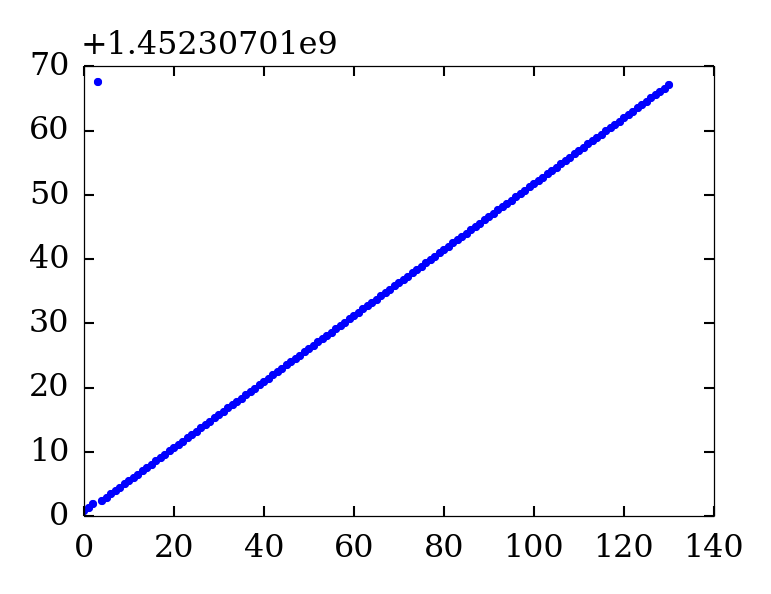

In [15]:
plt.plot(stg.epoch[stg.sweep_index==0],'.')

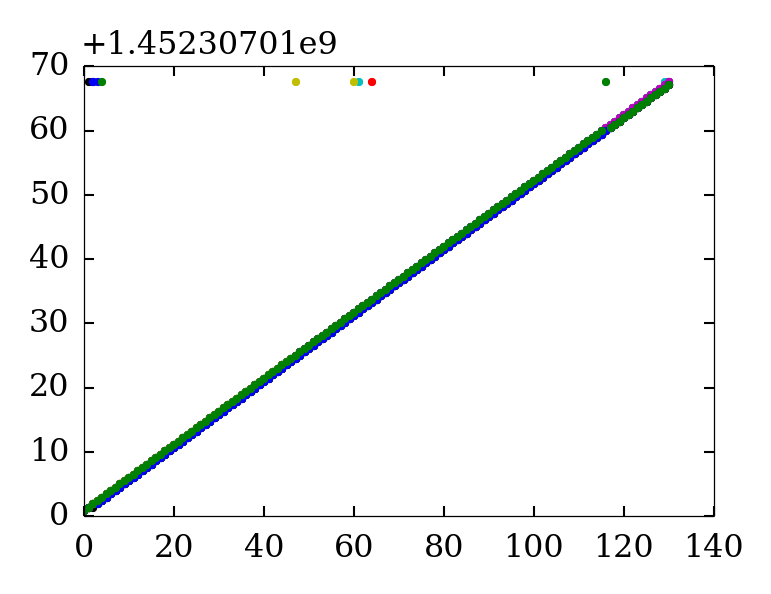

In [16]:
for n in indices:
    plt.plot(stg.epoch[stg.sweep_index==n], '.')

In [21]:
np.arange(3)[np.array([1])]

array([1])